# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_4:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [117]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

'''from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go'''
#offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading Data

In [118]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')
project_data=project_data.sample(n=5000)


In [119]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (5000, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [120]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95


# 1.2 Data Analysis

Number of projects thar are approved for funding  4269 , ( 85.38 %)
Number of projects thar are not approved for funding  731 , ( 14.62 %)


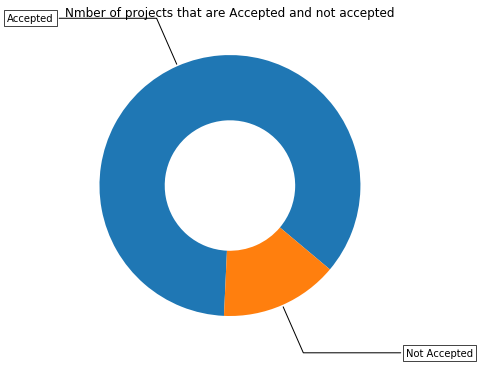

In [121]:
# PROVIDE CITATIONS TO YOUR CODE IF YOU TAKE IT FROM ANOTHER WEBSITE.
# https://matplotlib.org/gallery/pie_and_polar_charts/pie_and_donut_labels.html#sphx-glr-gallery-pie-and-polar-charts-pie-and-donut-labels-py


y_value_counts = project_data['project_is_approved'].value_counts()
print("Number of projects thar are approved for funding ", y_value_counts[1], ", (", (y_value_counts[1]/(y_value_counts[1]+y_value_counts[0]))*100,"%)")
print("Number of projects thar are not approved for funding ", y_value_counts[0], ", (", (y_value_counts[0]/(y_value_counts[1]+y_value_counts[0]))*100,"%)")

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))
recipe = ["Accepted", "Not Accepted"]

data = [y_value_counts[1], y_value_counts[0]]

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                 horizontalalignment=horizontalalignment, **kw)

ax.set_title("Nmber of projects that are Accepted and not accepted")

plt.show()

### 1.2.1 Univariate Analysis: School State

In [122]:
# Pandas dataframe groupby count, mean: https://stackoverflow.com/a/19385591/4084039

temp = pd.DataFrame(project_data.groupby("school_state")["project_is_approved"].apply(np.mean)).reset_index()
# if you have data which contain only 0 and 1, then the mean = percentage (think about it)
temp.columns = ['state_code', 'num_proposals']

'''# How to plot US state heatmap: https://datascience.stackexchange.com/a/9620

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = temp['state_code'],
        z = temp['num_proposals'].astype(float),
        locationmode = 'USA-states',
        text = temp['state_code'],
        marker = dict(line = dict (color = 'rgb(255,255,255)',width = 2)),
        colorbar = dict(title = "% of pro")
    ) ]

layout = dict(
        title = 'Project Proposals % of Acceptance Rate by US States',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)',
        ),
    )

fig = go.Figure(data=data, layout=layout)
offline.iplot(fig, filename='us-map-heat-map')
'''

'# How to plot US state heatmap: https://datascience.stackexchange.com/a/9620\n\nscl = [[0.0, \'rgb(242,240,247)\'],[0.2, \'rgb(218,218,235)\'],[0.4, \'rgb(188,189,220)\'],            [0.6, \'rgb(158,154,200)\'],[0.8, \'rgb(117,107,177)\'],[1.0, \'rgb(84,39,143)\']]\n\ndata = [ dict(\n        type=\'choropleth\',\n        colorscale = scl,\n        autocolorscale = False,\n        locations = temp[\'state_code\'],\n        z = temp[\'num_proposals\'].astype(float),\n        locationmode = \'USA-states\',\n        text = temp[\'state_code\'],\n        marker = dict(line = dict (color = \'rgb(255,255,255)\',width = 2)),\n        colorbar = dict(title = "% of pro")\n    ) ]\n\nlayout = dict(\n        title = \'Project Proposals % of Acceptance Rate by US States\',\n        geo = dict(\n            scope=\'usa\',\n            projection=dict( type=\'albers usa\' ),\n            showlakes = True,\n            lakecolor = \'rgb(255, 255, 255)\',\n        ),\n    )\n\nfig = go.Figure(data=dat

In [123]:
# https://www.csi.cuny.edu/sites/default/files/pdf/administration/ops/2letterstabbrev.pdf
temp.sort_values(by=['num_proposals'], inplace=True)
print("States with lowest % approvals")
print(temp.head(5))
print('='*50)
print("States with highest % approvals")
print(temp.tail(5))

States with lowest % approvals
   state_code  num_proposals
41         SD       0.714286
26         MT       0.750000
25         MS       0.766667
0          AK       0.777778
50         WY       0.777778
States with highest % approvals
   state_code  num_proposals
23         MN       0.907692
39         RI       0.909091
8          DE       0.928571
21         ME       1.000000
46         VT       1.000000


In [124]:
#stacked bar plots matplotlib: https://matplotlib.org/gallery/lines_bars_and_markers/bar_stacked.html
def stack_plot(data, xtick, col2='project_is_approved', col3='total'):
    ind = np.arange(data.shape[0])
    
    plt.figure(figsize=(20,5))
    p1 = plt.bar(ind, data[col3].values)
    p2 = plt.bar(ind, data[col2].values)

    plt.ylabel('Projects')
    plt.title('Number of projects aproved vs rejected')
    plt.xticks(ind, list(data[xtick].values))
    plt.legend((p1[0], p2[0]), ('total', 'accepted'))
    plt.show()

In [125]:
def univariate_barplots(data, col1, col2='project_is_approved', top=False):
    # Count number of zeros in dataframe python: https://stackoverflow.com/a/51540521/4084039
    temp = pd.DataFrame(project_data.groupby(col1)[col2].agg(lambda x: x.eq(1).sum())).reset_index()

    # Pandas dataframe grouby count: https://stackoverflow.com/a/19385591/4084039
    temp['total'] = pd.DataFrame(project_data.groupby(col1)[col2].agg({'total':'count'})).reset_index()['total']
    temp['Avg'] = pd.DataFrame(project_data.groupby(col1)[col2].agg({'Avg':'mean'})).reset_index()['Avg']
    
    temp.sort_values(by=['total'],inplace=True, ascending=False)
    
    if top:
        temp = temp[0:top]
    
    stack_plot(temp, xtick=col1, col2=col2, col3='total')
    print(temp.head(5))
    print("="*50)
    print(temp.tail(5))

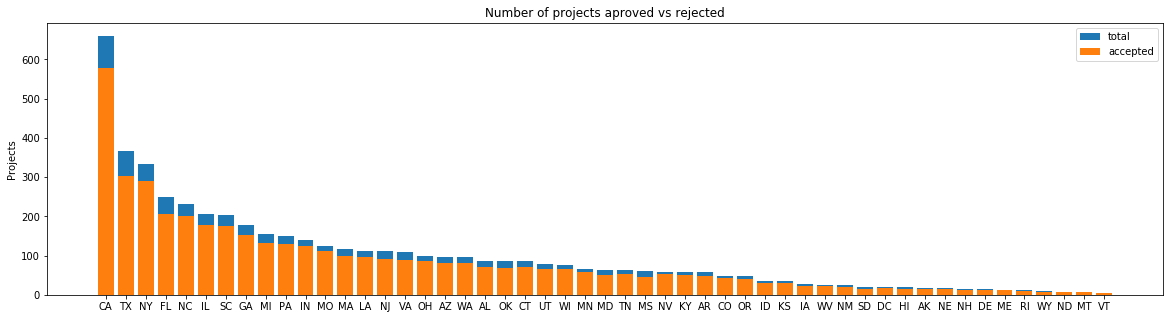

   school_state  project_is_approved  total       Avg
4            CA                  578    660  0.875758
43           TX                  302    366  0.825137
34           NY                  291    334  0.871257
9            FL                  206    249  0.827309
27           NC                  200    231  0.865801
   school_state  project_is_approved  total       Avg
39           RI                   10     11  0.909091
50           WY                    7      9  0.777778
28           ND                    7      8  0.875000
26           MT                    6      8  0.750000
46           VT                    4      4  1.000000


In [126]:
univariate_barplots(project_data, 'school_state', 'project_is_approved', False)

__SUMMARY: Every state has greater than 80% success rate in approval__


### 1.2.2 Univariate Analysis: teacher_prefix

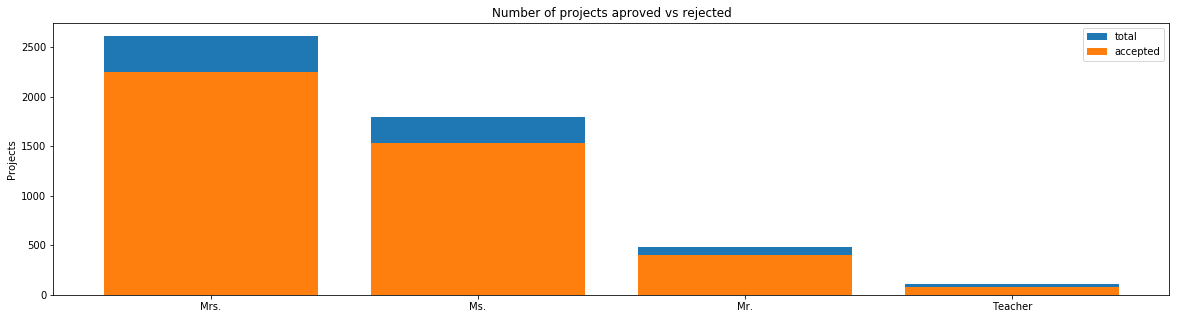

  teacher_prefix  project_is_approved  total       Avg
1           Mrs.                 2249   2614  0.860367
2            Ms.                 1537   1794  0.856745
0            Mr.                  400    485  0.824742
3        Teacher                   83    107  0.775701
  teacher_prefix  project_is_approved  total       Avg
1           Mrs.                 2249   2614  0.860367
2            Ms.                 1537   1794  0.856745
0            Mr.                  400    485  0.824742
3        Teacher                   83    107  0.775701


In [127]:
univariate_barplots(project_data, 'teacher_prefix', 'project_is_approved' , top=False)

#### Observation : Probability of a project getting approved slightly depends of the PreFix of the Teacher

### 1.2.3 Univariate Analysis: project_grade_category

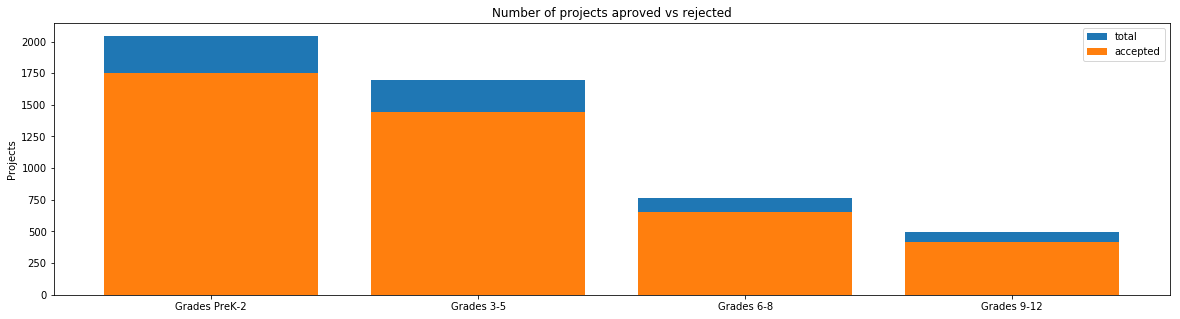

  project_grade_category  project_is_approved  total       Avg
3          Grades PreK-2                 1755   2044  0.858611
0             Grades 3-5                 1447   1694  0.854191
1             Grades 6-8                  650    768  0.846354
2            Grades 9-12                  417    494  0.844130
  project_grade_category  project_is_approved  total       Avg
3          Grades PreK-2                 1755   2044  0.858611
0             Grades 3-5                 1447   1694  0.854191
1             Grades 6-8                  650    768  0.846354
2            Grades 9-12                  417    494  0.844130


In [268]:
univariate_barplots(project_data, 'project_grade_category', 'project_is_approved', top=False)

#### Summary:Lower grade teachers have a slightly higher  chance of getting their project approved.

### 1.2.4 Univariate Analysis: project_subject_categories

In [129]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())

In [130]:
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories
93411,96739,p042250,1459f172060e74eed5c532d29dadaf30,Ms.,CT,2016-09-15 21:59:22,Grades 3-5,Literacy,The More Words the Merrier,My third grade classroom consists of 29 studen...,These students will be using the materials dur...,NaN,NaN,My students need to read words fluently to hel...,0,1,Literacy_Language
89705,143427,p250869,0547c63db5227d9af4d9b55fd9cc9d73,Mrs.,AL,2016-09-01 11:11:54,Grades 3-5,"Literature & Writing, Mathematics",Students: Motivated Through Technology,Our students come from a variety of different ...,Students will be learning to use Office 365 to...,NaN,NaN,My students need student computers for equal a...,2,0,Literacy_Language Math_Science


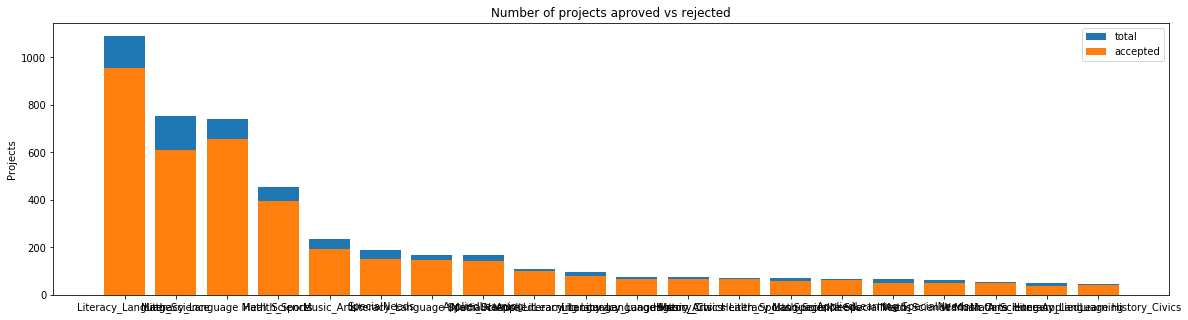

                  clean_categories  project_is_approved  total       Avg
22               Literacy_Language                  957   1090  0.877982
30                    Math_Science                  611    754  0.810345
26  Literacy_Language Math_Science                  657    739  0.889039
8                    Health_Sports                  395    454  0.870044
37                      Music_Arts                  195    236  0.826271
                    clean_categories  project_is_approved  total       Avg
6       AppliedLearning SpecialNeeds                   50     65  0.769231
35           Math_Science Music_Arts                   51     64  0.796875
46                Warmth Care_Hunger                   49     56  0.875000
31      Math_Science AppliedLearning                   37     51  0.725490
25  Literacy_Language History_Civics                   43     47  0.914894


In [131]:
univariate_barplots(project_data, 'clean_categories', 'project_is_approved', top=20)

In [132]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

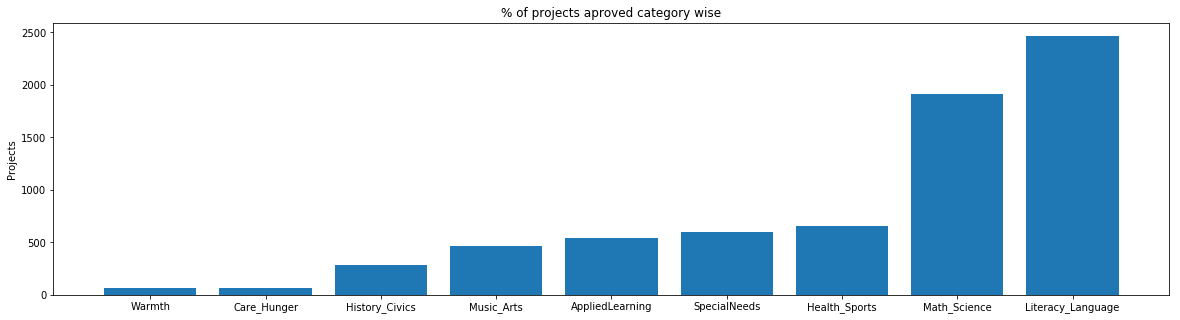

In [133]:
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


ind = np.arange(len(sorted_cat_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(sorted_cat_dict.values()))

plt.ylabel('Projects')
plt.title('projects count category wise')
plt.xticks(ind, list(sorted_cat_dict.keys()))
plt.show()

In [134]:
for i, j in sorted_cat_dict.items():
    print("{:20} :{:10}".format(i,j))

Warmth               :        61
Care_Hunger          :        61
History_Civics       :       284
Music_Arts           :       466
AppliedLearning      :       538
SpecialNeeds         :       601
Health_Sports        :       652
Math_Science         :      1913
Literacy_Language    :      2466


### 1.2.5 Univariate Analysis: project_subject_subcategories

In [135]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

In [136]:
project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories
93411,96739,p042250,1459f172060e74eed5c532d29dadaf30,Ms.,CT,2016-09-15 21:59:22,Grades 3-5,The More Words the Merrier,My third grade classroom consists of 29 studen...,These students will be using the materials dur...,NaN,NaN,My students need to read words fluently to hel...,0,1,Literacy_Language,Literacy
89705,143427,p250869,0547c63db5227d9af4d9b55fd9cc9d73,Mrs.,AL,2016-09-01 11:11:54,Grades 3-5,Students: Motivated Through Technology,Our students come from a variety of different ...,Students will be learning to use Office 365 to...,NaN,NaN,My students need student computers for equal a...,2,0,Literacy_Language Math_Science,Literature_Writing Mathematics


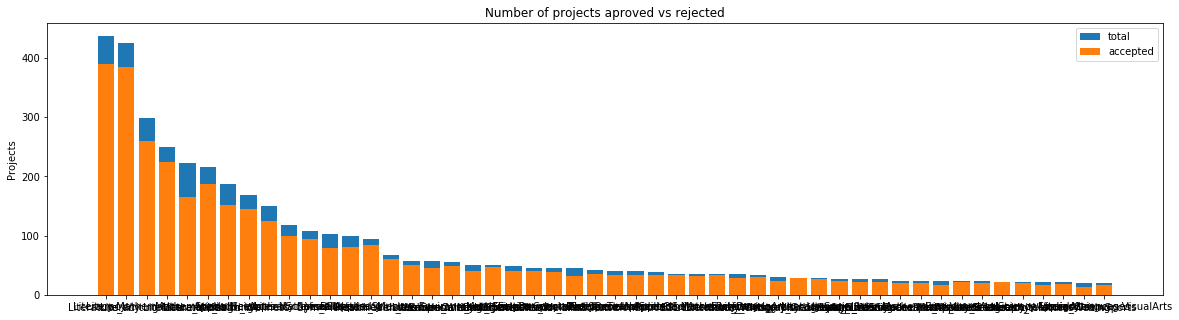

                clean_subcategories  project_is_approved  total       Avg
183                        Literacy                  389    437  0.890160
185            Literacy Mathematics                  385    425  0.905882
196  Literature_Writing Mathematics                  260    299  0.869565
184     Literacy Literature_Writing                  225    250  0.900000
205                     Mathematics                  166    223  0.744395
                    clean_subcategories  project_is_approved  total       Avg
10   AppliedSciences Literature_Writing                   20     21  0.952381
193                 Literacy VisualArts                   16     21  0.761905
171          Health_Wellness TeamSports                   18     21  0.857143
133                    ForeignLanguages                   14     20  0.700000
17           AppliedSciences VisualArts                   16     20  0.800000


In [137]:
univariate_barplots(project_data, 'clean_subcategories', 'project_is_approved', top=50)

In [138]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
from collections import Counter
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())

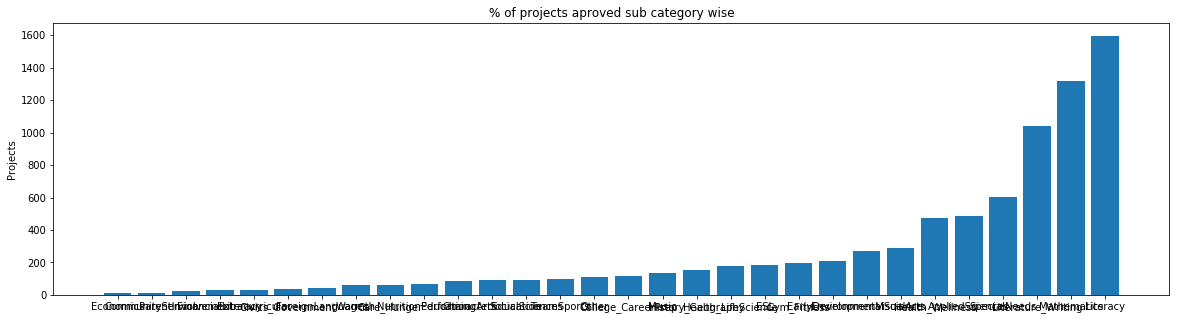

In [139]:
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))


ind = np.arange(len(sorted_sub_cat_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(sorted_sub_cat_dict.values()))

plt.ylabel('Projects')
plt.title('% of projects aproved sub category wise')
plt.xticks(ind, list(sorted_sub_cat_dict.keys()))
plt.show()

In [140]:
for i, j in sorted_sub_cat_dict.items():
    print("{:20} :{:10}".format(i,j))

Economics            :        10
CommunityService     :        13
ParentInvolvement    :        21
FinancialLiteracy    :        28
Extracurricular      :        30
Civics_Government    :        37
ForeignLanguages     :        42
Warmth               :        61
Care_Hunger          :        61
NutritionEducation   :        67
PerformingArts       :        87
CharacterEducation   :        91
SocialSciences       :        92
TeamSports           :       100
Other                :       109
College_CareerPrep   :       116
Music                :       138
History_Geography    :       151
Health_LifeScience   :       180
ESL                  :       187
Gym_Fitness          :       197
EarlyDevelopment     :       212
EnvironmentalScience :       268
VisualArts           :       288
Health_Wellness      :       474
AppliedSciences      :       489
SpecialNeeds         :       601
Literature_Writing   :      1043
Mathematics          :      1318
Literacy             :      1596


### 1.2.6 Univariate Analysis: Text features (Title)

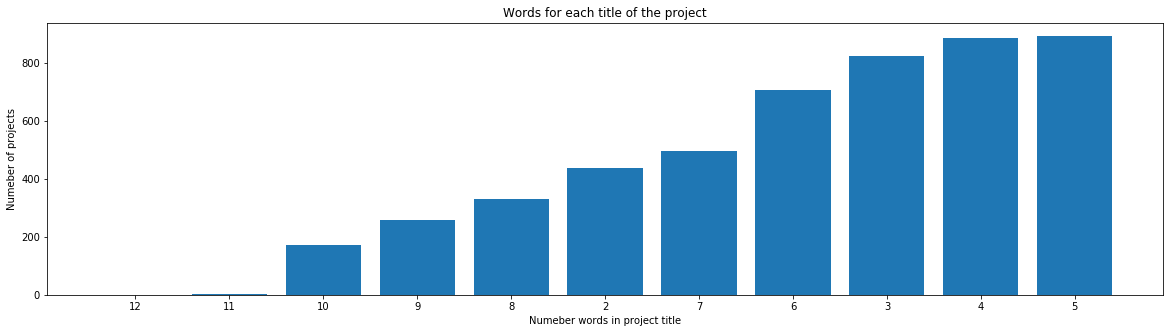

In [141]:
#How to calculate number of words in a string in DataFrame: https://stackoverflow.com/a/37483537/4084039
word_count = project_data['project_title'].str.split().apply(len).value_counts()
word_dict = dict(word_count)
word_dict = dict(sorted(word_dict.items(), key=lambda kv: kv[1]))


ind = np.arange(len(word_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(word_dict.values()))

plt.ylabel('Number of projects')
plt.xlabel('Number words in project title')
plt.title('Words for each title of the project')
plt.xticks(ind, list(word_dict.keys()))
plt.show()

In [142]:
approved_title_word_count = project_data[project_data['project_is_approved']==1]['project_title'].str.split().apply(len)
approved_title_word_count = approved_title_word_count.values

rejected_title_word_count = project_data[project_data['project_is_approved']==0]['project_title'].str.split().apply(len)
rejected_title_word_count = rejected_title_word_count.values

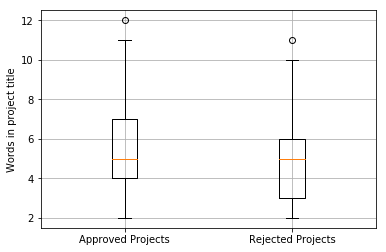

In [143]:
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
plt.boxplot([approved_title_word_count, rejected_title_word_count])
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.ylabel('Words in project title')
plt.grid()
plt.show()

#### Summary:Having more words makes it more descriptive and hence leads to increased probablity approval 

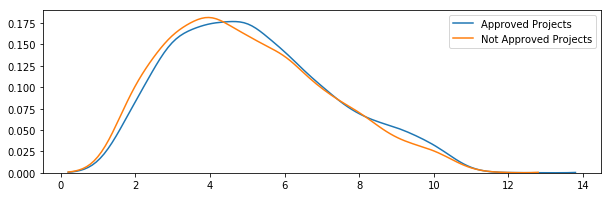

In [144]:
plt.figure(figsize=(10,3))
sns.kdeplot(approved_title_word_count,label="Approved Projects", bw=0.6)
sns.kdeplot(rejected_title_word_count,label="Not Approved Projects", bw=0.6)
plt.legend()
plt.show()

### 1.2.7 Univariate Analysis: Text features (Project Essay's)

In [145]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [146]:
approved_word_count = project_data[project_data['project_is_approved']==1]['essay'].str.split().apply(len)
approved_word_count = approved_word_count.values

rejected_word_count = project_data[project_data['project_is_approved']==0]['essay'].str.split().apply(len)
rejected_word_count = rejected_word_count.values

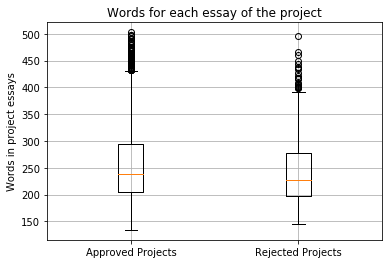

In [147]:
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
plt.boxplot([approved_word_count, rejected_word_count])
plt.title('Words for each essay of the project')
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.ylabel('Words in project essays')
plt.grid()
plt.show()

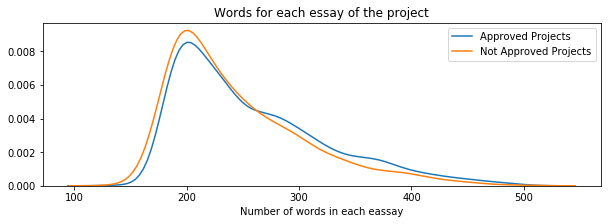

In [148]:
plt.figure(figsize=(10,3))
sns.distplot(approved_word_count, hist=False, label="Approved Projects")
sns.distplot(rejected_word_count, hist=False, label="Not Approved Projects")
plt.title('Words for each essay of the project')
plt.xlabel('Number of words in each eassay')
plt.legend()
plt.show()

#### Summary:Having more words makes it more descriptive and hence leads to increased probablity of approval 

### 1.2.8 Univariate Analysis: Cost per project

In [149]:
# we get the cost of the project using resource.csv file
resource_data.head(2)

,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95


In [150]:
# https://stackoverflow.com/questions/22407798/how-to-reset-a-dataframes-indexes-for-all-groups-in-one-step
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
price_data.head(2)

,id,price,quantity
0,p000001,459.56,7
1,p000002,515.89,21


In [151]:
# join two dataframes in python: 
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [152]:
approved_price = project_data[project_data['project_is_approved']==1]['price'].values

rejected_price = project_data[project_data['project_is_approved']==0]['price'].values

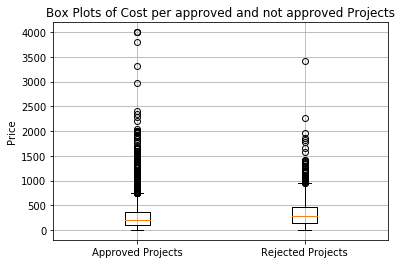

In [153]:
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
plt.boxplot([approved_price, rejected_price])
plt.title('Box Plots of Cost per approved and not approved Projects')
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.ylabel('Price')
plt.grid()
plt.show()

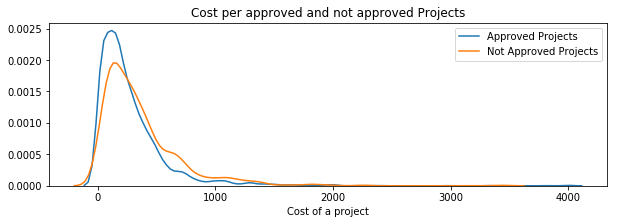

In [154]:
plt.figure(figsize=(10,3))
sns.distplot(approved_price, hist=False, label="Approved Projects")
sns.distplot(rejected_price, hist=False, label="Not Approved Projects")
plt.title('Cost per approved and not approved Projects')
plt.xlabel('Cost of a project')
plt.legend()
plt.show()

In [155]:
# http://zetcode.com/python/prettytable/
from prettytable import PrettyTable

#If you get a ModuleNotFoundError error , install prettytable using: pip3 install prettytable

x = PrettyTable()
x.field_names = ["Percentile", "Approved Projects", "Not Approved Projects"]

for i in range(0,101,5):
    x.add_row([i,np.round(np.percentile(approved_price,i), 3), np.round(np.percentile(rejected_price,i), 3)])
print(x)

+------------+-------------------+-----------------------+
| Percentile | Approved Projects | Not Approved Projects |
+------------+-------------------+-----------------------+
|     0      |        0.92       |          5.25         |
|     5      |       13.048      |         46.33         |
|     10     |       33.98       |         71.98         |
|     15     |       57.558      |         95.58         |
|     20     |       74.48       |         111.33        |
|     25     |       98.99       |        136.015        |
|     30     |      113.968      |         158.6         |
|     35     |      136.704      |        182.065        |
|     40     |       157.0       |         211.13        |
|     45     |      177.164      |         244.62        |
|     50     |       196.99      |         273.49        |
|     55     |      221.082      |        299.435        |
|     60     |      253.798      |         328.56        |
|     65     |      280.078      |        381.185       

#### Summary: it is quite evident that lower pricing projects have higher approval rates

<h3><font color='red'>1.2.9 Univariate Analysis: teacher_number_of_previously_posted_projects</font></h3>

Please do this on your own based on the data analysis that was done in the above cells

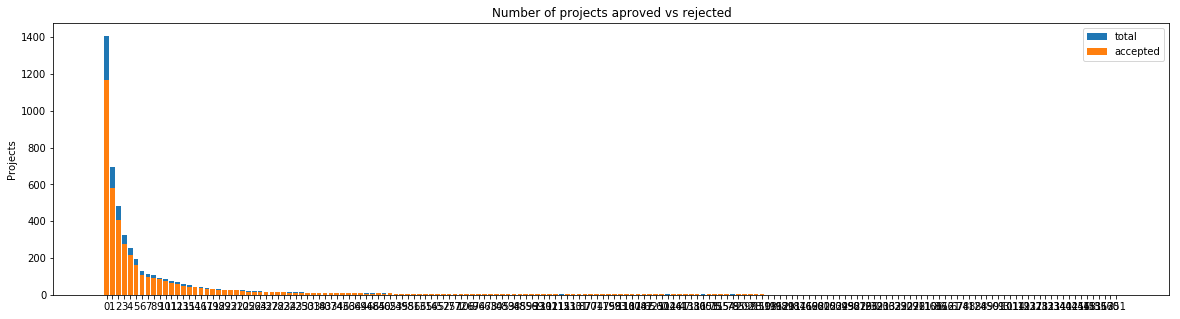

   teacher_number_of_previously_posted_projects  project_is_approved  total  \
0                                             0                 1167   1407   
1                                             1                  582    697   
2                                             2                  406    482   
3                                             3                  277    324   
4                                             4                  217    257   

        Avg  
0  0.829424  
1  0.835007  
2  0.842324  
3  0.854938  
4  0.844358  
     teacher_number_of_previously_posted_projects  project_is_approved  total  \
133                                           153                    1      1   
136                                           156                    0      1   
137                                           157                    0      1   
138                                           160                    1      1   
171                                 

In [156]:
univariate_barplots(project_data, 'teacher_number_of_previously_posted_projects', 'project_is_approved',)

#### Summary: We can't find any solid ground with this feature. 

<h3><font color='red'>1.2.10 Univariate Analysis: project_resource_summary</font></h3>

Please do this on your own based on the data analysis that was done in the above cells

Check if the `presence of the numerical digits` in the `project_resource_summary` effects the acceptance of the project or not. If you observe that `presence of the numerical digits` is helpful in the classification, please include it for further process or you can ignore it.

In [157]:
list_project_resource_summary =list(project_data['project_resource_summary'].values)

presence_numeric=[]
for prs in list_project_resource_summary:
    if any(char.isdigit() for char in prs):
        presence_numeric.append(1)
    else:
        presence_numeric.append(0)


In [158]:
project_data['Numeric_presence_summary']=presence_numeric


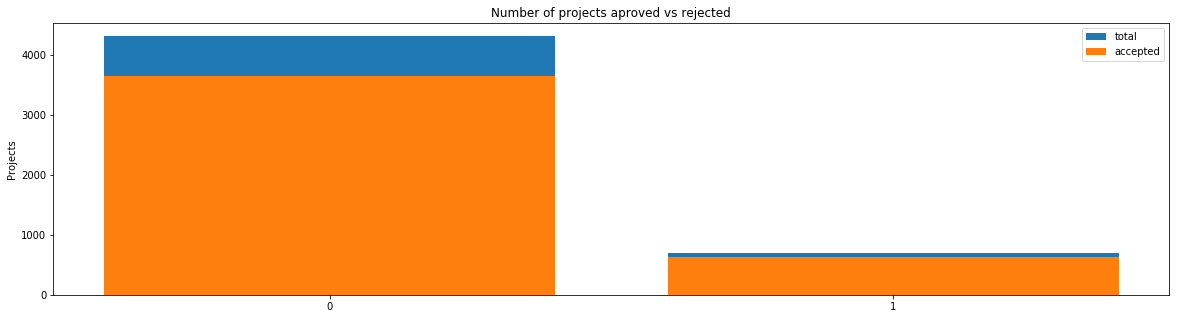

   Numeric_presence_summary  project_is_approved  total       Avg
0                         0                 3635   4309  0.843583
1                         1                  634    691  0.917511
   Numeric_presence_summary  project_is_approved  total       Avg
0                         0                 3635   4309  0.843583
1                         1                  634    691  0.917511


In [159]:
univariate_barplots(project_data, 'Numeric_presence_summary', 'project_is_approved')

#### Summary: presence of the numerical digits in the project_resource_summary effects the acceptance of the project 

## 1.3 Text preprocessing

### 1.3.1 Essay Text

In [160]:
project_data.head(2)


,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,...,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price,quantity,Numeric_presence_summary
0,96739,p042250,1459f172060e74eed5c532d29dadaf30,Ms.,CT,2016-09-15 21:59:22,Grades 3-5,The More Words the Merrier,My third grade classroom consists of 29 studen...,These students will be using the materials dur...,...,NaN,My students need to read words fluently to hel...,0,1,Literacy_Language,Literacy,My third grade classroom consists of 29 studen...,546.99,4,0
1,143427,p250869,0547c63db5227d9af4d9b55fd9cc9d73,Mrs.,AL,2016-09-01 11:11:54,Grades 3-5,Students: Motivated Through Technology,Our students come from a variety of different ...,Students will be learning to use Office 365 to...,...,NaN,My students need student computers for equal a...,2,0,Literacy_Language Math_Science,Literature_Writing Mathematics,Our students come from a variety of different ...,214.89,3,0


In [161]:
# printing some random essays.
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
# print("="*50)
# print(project_data['essay'].values[20000])
# print("="*50)
# print(project_data['essay'].values[99999])
# print("="*50)


My third grade classroom consists of 29 students.  As a teacher in a low-income/high poverty school district, my students are faced with several challenges both in and out of the classroom. Despite the many challenges they face. I am looking to keep things simple and provide my students with meaningful reading experiences. These students vary in academic levels and often struggle with staying on task and being able to answer comprehension questions.  Yet, even with their struggle they are still willing to try and put effort into their schooling.  These children want their education and I want to be at least one person to help them meet their reading goal.  \r\n\r\nMy students are always eager to pick out a book of interest.\r\n\r\nMany of them are being raised in single parent households and receive a free lunch based on their socioeconomic status. These things may prevent them from getting ahead early in life and may not provide them with the life experiences many of us see as \"typic

In [162]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [163]:
sent = decontracted(project_data['essay'].values[200])
print(sent)
print("="*50)

Our third graders love to explore the world around them and to research topics that have stimulated their curiosity.  In our classroom, we create opportunities for problem based learning to give students more ownership of their learning experience.  \r\nEducation is more than what is contained in the classroom.  Our eager and capable students need to be able to reach beyond our classroom resources for information.  Kids love technology and our students would be excited to jump into their research and discover more and more about their topics.  Third graders love to learn and we need to give them wonderful opportunities to do just that.Chromebooks would go right to work in our classroom. In third grade students research the solar system, weather, animal adaptations, and more. With Chromebooks, they could research, set up a google doc to collaborate, and share their results with classmates. \r\nWe would have many uses for Chromebooks.\r\nBesides using them for science and informational r

In [164]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

Our third graders love to explore the world around them and to research topics that have stimulated their curiosity.  In our classroom, we create opportunities for problem based learning to give students more ownership of their learning experience.    Education is more than what is contained in the classroom.  Our eager and capable students need to be able to reach beyond our classroom resources for information.  Kids love technology and our students would be excited to jump into their research and discover more and more about their topics.  Third graders love to learn and we need to give them wonderful opportunities to do just that.Chromebooks would go right to work in our classroom. In third grade students research the solar system, weather, animal adaptations, and more. With Chromebooks, they could research, set up a google doc to collaborate, and share their results with classmates.   We would have many uses for Chromebooks.  Besides using them for science and informational researc

In [165]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

Our third graders love to explore the world around them and to research topics that have stimulated their curiosity In our classroom we create opportunities for problem based learning to give students more ownership of their learning experience Education is more than what is contained in the classroom Our eager and capable students need to be able to reach beyond our classroom resources for information Kids love technology and our students would be excited to jump into their research and discover more and more about their topics Third graders love to learn and we need to give them wonderful opportunities to do just that Chromebooks would go right to work in our classroom In third grade students research the solar system weather animal adaptations and more With Chromebooks they could research set up a google doc to collaborate and share their results with classmates We would have many uses for Chromebooks Besides using them for science and informational research they could be used for m

In [166]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [167]:

def Text_cleaner(data):
    # Combining all the above statemennts 
    from tqdm import tqdm
    preprocessed_essays = []
    # tqdm is for printing the status bar
    for sentance in tqdm(data.values):
        sent = decontracted(sentance)
        sent = sent.replace('\\r', ' ')
        sent = sent.replace('\\"', ' ')
        sent = sent.replace('\\n', ' ')
        sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
        # https://gist.github.com/sebleier/554280
        sent = ' '.join(e for e in sent.split() if e not in stopwords)
        preprocessed_essays.append(sent.lower().strip())
    return preprocessed_essays

In [168]:
# after preprocesing
preprocessed_essays=Text_cleaner(project_data['essay'])
preprocessed_essays[1]

100%|████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:04<00:00, 1125.84it/s]


'our students come variety different economic backgrounds 90 percent students receiving free lunch the majority students considered high poverty many students come broken homes even living another family member we also diverse groups ethnicity immigrants within classroom setting as twenty first century school many students cannot afford bring devices school assignments digitally i want ensure students afforded opportunity creative meaningful learning experiences grow intellectually socially in order i must make sure twenty students within classroom equal access computers order expand education become competent digital learners my students diverse learning styles verbal kinesthetic struggle voice thinking clear concise manner students learning use office 365 create power points google docs word documents online students able synergize create digital projects based research conducted these projects often cross curriculum based definitely enhance learning students to able create using dig

<h3><font color='red'>1.3.2 Project title Text</font></h3>

In [169]:
# printing some random essays.
print(project_data['project_title'].values)

['The More Words the Merrier' 'Students:  Motivated Through Technology'
 'Kahoots for Chromebooks!' ... 'Light The Spark Through Color'
 'Learning is beyond a textbook.  Technology can open minds!'
 "Oh The Places We'll Go (& Grow) Listening To Books!"]


In [170]:
cleaned_Proj_title=Text_cleaner(project_data['project_title'])

100%|███████████████████████████████████████████████████████████████████████████| 5000/5000 [00:00<00:00, 39894.46it/s]


In [171]:
cleaned_Proj_title[10]

'wobble chairs target learning'

## 1. 4 Preparing data for models

In [172]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay', 'price', 'quantity',
       'Numeric_presence_summary'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data
       
       - quantity : numerical
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 1.4.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

In [173]:
# we use count vectorizer to convert the values into one hot encoded features
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(project_data['clean_categories'].values)
print(vectorizer.get_feature_names())


categories_one_hot = vectorizer.transform(project_data['clean_categories'].values)
print("Shape of matrix after one hot encodig ",categories_one_hot.shape)

['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
Shape of matrix after one hot encodig  (5000, 9)


In [174]:
# we use count vectorizer to convert the values into one hot encoded features
vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(project_data['clean_subcategories'].values)
print(vectorizer.get_feature_names())


sub_categories_one_hot = vectorizer.transform(project_data['clean_subcategories'].values)
print("Shape of matrix after one hot encodig ",sub_categories_one_hot.shape)

['Economics', 'CommunityService', 'ParentInvolvement', 'FinancialLiteracy', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'Warmth', 'Care_Hunger', 'NutritionEducation', 'PerformingArts', 'CharacterEducation', 'SocialSciences', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'ESL', 'Gym_Fitness', 'EarlyDevelopment', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
Shape of matrix after one hot encodig  (5000, 30)


In [175]:
#https://machinelearningmastery.com/how-to-one-hot-encode-sequence-data-in-python/

# Please do the similar feature encoding with school_state,
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

#integer encode
label_encoder_skl_state=LabelEncoder()
integer_encoded_skl_state=label_encoder_skl_state.fit_transform(project_data['school_state'])
print(integer_encoded_skl_state)

#Binary encode
onehot_encoder_skl_state=OneHotEncoder(sparse=False)
integer_encoded_skl_state=integer_encoded_skl_state.reshape(len(integer_encoded_skl_state), 1)
onehot_encoded_skl_state = onehot_encoder_skl_state.fit_transform(integer_encoded_skl_state)
print(onehot_encoded_skl_state.shape)

project_data['school_state'].unique().size

label_encoder_skl_state.inverse_transform(integer_encoded_skl_state.T)


[ 6  1 18 ... 23  3 40]
(5000, 51)


array([['CT', 'AL', 'LA', ..., 'MN', 'AZ', 'SC']], dtype=object)

In [176]:
#https://machinelearningmastery.com/how-to-one-hot-encode-sequence-data-in-python/
#teacher_prefix

project_data['teacher_prefix'].fillna('Others',inplace=True)
#integer encode
label_encoder_tchr_prefix=LabelEncoder()
integer_encoded_tchr_prefix=label_encoder_tchr_prefix.fit_transform(project_data['teacher_prefix'])
print(integer_encoded_tchr_prefix)

#Binary encode
onehot_encoder_tchr_prefix=OneHotEncoder(sparse=False)
integer_encoded_tchr_prefix=integer_encoded_tchr_prefix.reshape(len(integer_encoded_tchr_prefix), 1)
onehot_encoded_tchr_prefix = onehot_encoder_tchr_prefix.fit_transform(integer_encoded_tchr_prefix)
print(onehot_encoded_tchr_prefix.shape)

project_data['teacher_prefix'].unique().size

[2 1 1 ... 1 1 1]
(5000, 4)


4

In [177]:
#https://machinelearningmastery.com/how-to-one-hot-encode-sequence-data-in-python/

#project_grade_category 


#integer encode
label_encoder_proj_grade_cat=LabelEncoder()
integer_encoded_proj_grade_cat=label_encoder_proj_grade_cat.fit_transform(project_data['project_grade_category'])
print(integer_encoded_proj_grade_cat)

#Binary encode
onehot_encoder_proj_grade_cat=OneHotEncoder(sparse=False)
integer_encoded_proj_grade_cat=integer_encoded_proj_grade_cat.reshape(len(integer_encoded_proj_grade_cat), 1)
onehot_encoded_proj_grade_cat = onehot_encoder_proj_grade_cat.fit_transform(integer_encoded_proj_grade_cat)
print(onehot_encoded_proj_grade_cat.shape)

project_data['project_grade_category'].unique().size

[0 0 0 ... 3 0 3]
(5000, 4)


4

In [215]:
#https://machinelearningmastery.com/how-to-one-hot-encode-sequence-data-in-python/

#school_state


#integer encode
label_encoder_school_state=LabelEncoder()
integer_encoded_school_state=label_encoder_school_state.fit_transform(project_data['school_state'])
print(integer_encoded_school_state)

#Binary encode
onehot_encoder_school_state=OneHotEncoder(sparse=False)
integer_encoded_school_state=integer_encoded_school_state.reshape(len(integer_encoded_school_state), 1)
onehot_encoded_school_state = onehot_encoder_school_state.fit_transform(integer_encoded_school_state)
print(onehot_encoded_school_state.shape)

project_data['school_state'].unique().size

[ 6  1 18 ... 23  3 40]
(5000, 51)


51

### 1.4.2 Vectorizing Text data

#### 1.4.2.1 Bag of words

In [178]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10)
text_bow_essay = vectorizer.fit_transform(preprocessed_essays)
print("Shape of matrix after one hot encodig ",text_bow_essay.shape)

Shape of matrix after one hot encodig  (5000, 4347)


<h4><font color='red'> 1.4.2.2 Bag of Words on `project_title`</font></h4>

In [179]:
# you can vectorize the title also 
# before you vectorize the title make sure you preprocess it
vectorizer = CountVectorizer(min_df=5)
text_bow_proj_title = vectorizer.fit_transform(cleaned_Proj_title)
print("Shape of matrix after one hot encodig ",text_bow_proj_title.shape)


Shape of matrix after one hot encodig  (5000, 708)


#### 1.4.2.3 TFIDF vectorizer

In [180]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
text_tfidf_essay = vectorizer.fit_transform(preprocessed_essays)
print("Shape of matrix after one hot encodig ",text_tfidf_essay.shape)

Shape of matrix after one hot encodig  (5000, 4347)


<h4><font color='red'> 1.4.2.4 TFIDF Vectorizer on `project_title`</font></h4>

In [181]:
# Similarly you can vectorize for title alsovectorizer = TfidfVectorizer(min_df=10)
vectorizer = TfidfVectorizer(min_df=5)
text_tfidf_proj_title = vectorizer.fit_transform(cleaned_Proj_title)
print("Shape of matrix after one hot encodig ",text_tfidf_proj_title.shape)

Shape of matrix after one hot encodig  (5000, 708)


#### 1.4.2.5 Using Pretrained Models: Avg W2V

In [182]:
'''
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!

# ============================

words = []
for i in preproced_texts:
    words.extend(i.split(' '))

for i in preproced_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


'''

'\n# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039\ndef loadGloveModel(gloveFile):\n    print ("Loading Glove Model")\n    f = open(gloveFile,\'r\', encoding="utf8")\n    model = {}\n    for line in tqdm(f):\n        splitLine = line.split()\n        word = splitLine[0]\n        embedding = np.array([float(val) for val in splitLine[1:]])\n        model[word] = embedding\n    print ("Done.",len(model)," words loaded!")\n    return model\nmodel = loadGloveModel(\'glove.42B.300d.txt\')\n\n# ============================\nOutput:\n    \nLoading Glove Model\n1917495it [06:32, 4879.69it/s]\nDone. 1917495  words loaded!\n\n# ============================\n\nwords = []\nfor i in preproced_texts:\n    words.extend(i.split(\' \'))\n\nfor i in preproced_titles:\n    words.extend(i.split(\' \'))\nprint("all the words in the coupus", len(words))\nwords = set(words)\nprint("the unique words in the coupus", len(words))\n\ninter_words = set(model.keys()).intersection(word

In [183]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [184]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_essay = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_essay.append(vector)

print(len(avg_w2v_vectors_essay))
print(len(avg_w2v_vectors_essay[0]))

100%|████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:02<00:00, 1786.58it/s]


5000
300


<h4><font color='red'> 1.4.2.6 Using Pretrained Models: AVG W2V on `project_title`</font></h4>

In [185]:
# Similarly you can vectorize for title also
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_proj_title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(cleaned_Proj_title): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_proj_title.append(vector)

print(len(avg_w2v_vectors_proj_title))
print(len(avg_w2v_vectors_proj_title[0]))

100%|███████████████████████████████████████████████████████████████████████████| 5000/5000 [00:00<00:00, 59665.31it/s]


5000
300


#### 1.4.2.7 Using Pretrained Models: TFIDF weighted W2V

In [186]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_essays)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words_essay = set(tfidf_model.get_feature_names())

In [187]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_essay = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words_essay):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_essay.append(vector)

print(len(tfidf_w2v_vectors_essay))
print(len(tfidf_w2v_vectors_essay[0]))

100%|█████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:20<00:00, 246.96it/s]


5000
300


<h4><font color='red'> 1.4.2.9 Using Pretrained Models: TFIDF weighted W2V on `project_title`</font></h4>

In [188]:
# Similarly you can vectorize for tit# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(cleaned_Proj_title)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words_proj_title = set(tfidf_model.get_feature_names())

In [189]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_proj_title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(cleaned_Proj_title): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words_proj_title):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_proj_title.append(vector)

print(len(tfidf_w2v_vectors_proj_title))
print(len(tfidf_w2v_vectors_proj_title[0]))

100%|███████████████████████████████████████████████████████████████████████████| 5000/5000 [00:00<00:00, 29453.02it/s]


5000
300


### 1.4.3 Vectorizing Numerical features

In [190]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = StandardScaler()
price_scalar.fit(project_data['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
price_standardized = price_scalar.transform(project_data['price'].values.reshape(-1, 1))

Mean : 289.771854, Standard deviation : 310.38796282069745


In [191]:
price_standardized

array([[ 0.82869884],
       [-0.24125244],
       [-0.37073556],
       ...,
       [-0.66700993],
       [-0.38826201],
       [ 0.21011815]])

### 1.4.4 Merging all the above features

- we need to merge all the numerical vectors i.e catogorical, text, numerical vectors

In [216]:
school_state =onehot_encoded_school_state
print(school_state.shape)
print(categories_one_hot.shape)
print(sub_categories_one_hot.shape)
print(onehot_encoded_tchr_prefix.shape)
print(text_bow_proj_title.shape)
print(text_tfidf_proj_title.shape)
print("({},{})".format(len(avg_w2v_vectors_proj_title),len(avg_w2v_vectors_proj_title[0])))
print("({},{})".format(len(tfidf_w2v_vectors_proj_title),len(tfidf_w2v_vectors_proj_title[0])))
print(price_standardized.shape)
no_of_prev_posted=project_data['teacher_number_of_previously_posted_projects']
no_of_prev_posted=no_of_prev_posted[:,np.newaxis]
print(no_of_prev_posted.shape)

print(type(school_state))
print(type(categories_one_hot))
print(type(sub_categories_one_hot))
print(type(onehot_encoded_tchr_prefix))
print(type(text_bow_proj_title))
print(type(text_tfidf_proj_title))
print(type(avg_w2v_vectors_proj_title))
print(type(tfidf_w2v_vectors_proj_title))
print(type(price_standardized))
print(type(price_standardized))



(5000, 51)
(5000, 9)
(5000, 30)
(5000, 4)
(5000, 708)
(5000, 708)
(5000,300)
(5000,300)
(5000, 1)
(5000, 1)
<class 'numpy.ndarray'>
<class 'scipy.sparse.csr.csr_matrix'>
<class 'scipy.sparse.csr.csr_matrix'>
<class 'numpy.ndarray'>
<class 'scipy.sparse.csr.csr_matrix'>
<class 'scipy.sparse.csr.csr_matrix'>
<class 'list'>
<class 'list'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [217]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X_bow = hstack((categories_one_hot, sub_categories_one_hot,onehot_encoded_tchr_prefix,
            text_bow_proj_title
            )).toarray()


X_tfidf=  hstack((categories_one_hot, sub_categories_one_hot,onehot_encoded_tchr_prefix,
            text_tfidf_proj_title
            )).toarray()

X_w2v= hstack((categories_one_hot, sub_categories_one_hot,onehot_encoded_tchr_prefix,
            avg_w2v_vectors_proj_title
            )).toarray()

X_tfidf_w2v=hstack((categories_one_hot, sub_categories_one_hot,onehot_encoded_tchr_prefix,
            tfidf_w2v_vectors_proj_title
            )).toarray()







In [218]:

bow_ds=np.concatenate((school_state,X_bow,price_standardized,no_of_prev_posted),axis =1)
tfidf_ds=np.concatenate((school_state,X_tfidf,price_standardized,no_of_prev_posted),axis =1)
w2v_ds=np.concatenate((school_state,X_w2v,price_standardized,no_of_prev_posted),axis =1)
tfidf_w2v_ds=np.concatenate((school_state,X_tfidf_w2v,price_standardized,no_of_prev_posted),axis =1)

print(bow_ds.shape)
print(tfidf_ds.shape)
print(w2v_ds.shape)
print(tfidf_w2v_ds.shape)

(5000, 804)
(5000, 804)
(5000, 396)
(5000, 396)


In [219]:
X_full=hstack((categories_one_hot, sub_categories_one_hot,onehot_encoded_tchr_prefix,
            text_bow_proj_title,text_tfidf_proj_title,avg_w2v_vectors_proj_title,tfidf_w2v_vectors_proj_title
            )).toarray()

Full_ds=np.concatenate((school_state,X_tfidf_w2v,price_standardized,no_of_prev_posted),axis =1)

print(Full_ds.shape)

(5000, 396)


<h1><font color='red'>Assignment 2: Apply TSNE<font></h1>

 <font color=#F4274F>If you are using any code snippet from the internet, you have to provide the reference/citations, as we did in the above cells. Otherwise, it will be treated as plagiarism without citations.</font>

<ol> 
    <li> In the above cells we have plotted and analyzed many features. Please observe the plots and write the observations in markdown cells below every plot.</li>
    <li> EDA: Please complete the analysis of the feature: teacher_number_of_previously_posted_projects</li>
    <li>
        <ul>Build the data matrix using these features 
            <li>school_state : categorical data (one hot encoding)</li>
            <li>clean_categories : categorical data (one hot encoding)</li>
            <li>clean_subcategories : categorical data (one hot encoding)</li>
            <li>teacher_prefix : categorical data (one hot encoding)</li>
            <li>project_title : text data (BOW, TFIDF, AVG W2V, TFIDF W2V)</li>
            <li>price : numerical</li>
            <li>teacher_number_of_previously_posted_projects : numerical</li>
         </ul>
    </li>
    <li> Now, plot FOUR t-SNE plots with each of these feature sets.
        <ol>
            <li>categorical, numerical features + project_title(BOW)</li>
            <li>categorical, numerical features + project_title(TFIDF)</li>
            <li>categorical, numerical features + project_title(AVG W2V)</li>
            <li>categorical, numerical features + project_title(TFIDF W2V)</li>
        </ol>
    </li>
    <li> Concatenate all the features and Apply TNSE on the final data matrix </li>
    <li> <font color='blue'>Note 1: The TSNE accepts only dense matrices</font></li>
    <li> <font color='blue'>Note 2: Consider only 5k to 6k data points to avoid memory issues. If you run into memory error issues, reduce the number of data points but clearly state the number of datat-poins you are using</font></li>
</ol>

<h2> 2.1 TSNE with `BOW` encoding of `project_title` feature </h2>

In [220]:
bow_ds.head(5)
project_data['']

,0,1,2,3,4,5,6,7,8,9,...,794,795,796,797,798,799,800,801,802,803
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.828699,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.241252,2.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.370736,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.588941,11.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.305656,0.0


In [248]:
# Applied AI course material 
from sklearn.manifold import TSNE

labels=project_data['project_is_approved']

model =TSNE(n_components=2, random_state=0)
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000

tsne_data_bow = model.fit_transform(bow_ds)



In [249]:
temp=tsne_data_bow

In [252]:
labels=labels[:,np.newaxis]
print(tsne_data_bow.shape)
print(labels.shape)



(5000, 2)
(5000, 1)


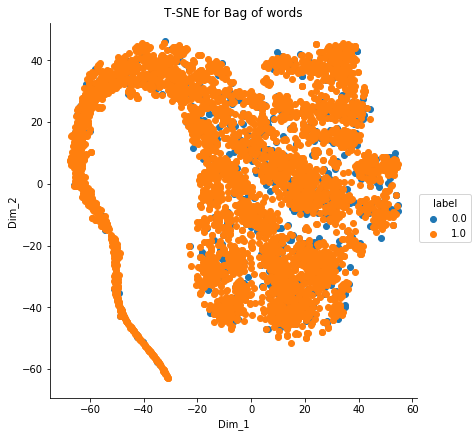

In [258]:
#creating a new data frame which help us in ploting the result data
temp1 = np.concatenate((temp, labels),axis=1)
temp1 = pd.DataFrame(data=temp1, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sns.FacetGrid(temp1, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title("T-SNE for Bag of words")
plt.show()

<h2> 2.2 TSNE with `TFIDF` encoding of `project_title` feature </h2>

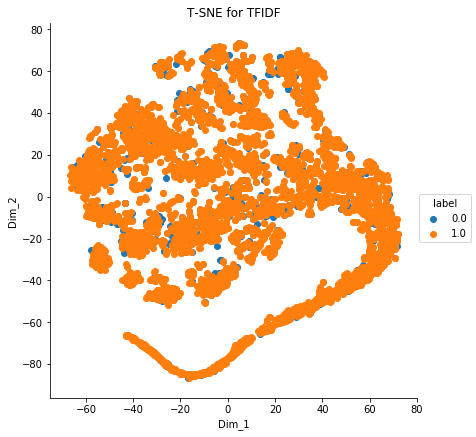

In [265]:
model =TSNE(n_components=2, random_state=0)
tsne_data_tfidf = model.fit_transform(tfidf_ds)
temp=tsne_data_tfidf
#creating a new data frame which help us in ploting the result data
temp1 = np.concatenate((temp, labels),axis=1)
temp1 = pd.DataFrame(data=temp1, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sns.FacetGrid(temp1, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title("T-SNE for TFIDF")
plt.show()

<h2> 2.3 TSNE with `AVG W2V` encoding of `project_title` feature </h2>

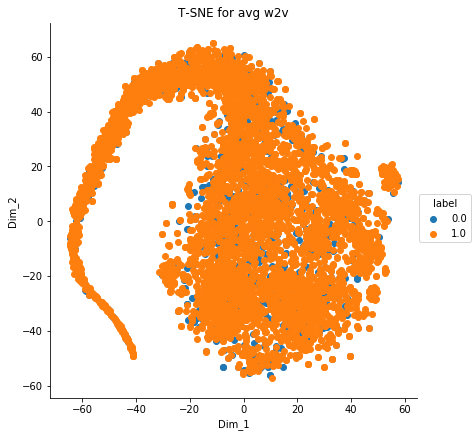

In [266]:
model =TSNE(n_components=2, random_state=0)
tsne_data_w2v = model.fit_transform(w2v_ds)
temp=tsne_data_w2v
#creating a new data frame which help us in ploting the result data
temp1 = np.concatenate((temp, labels),axis=1)
temp1 = pd.DataFrame(data=temp1, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sns.FacetGrid(temp1, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title("T-SNE for avg w2v")
plt.show()

<h2> 2.4 TSNE with `TFIDF Weighted W2V` encoding of `project_title` feature </h2>

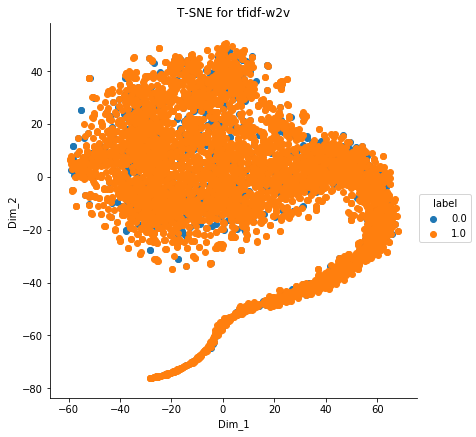

In [267]:
model =TSNE(n_components=2, random_state=0)
tsne_data_tfidf_w2v = model.fit_transform(tfidf_w2v_ds)
temp=tsne_data_tfidf_w2v
#creating a new data frame which help us in ploting the result data
temp1 = np.concatenate((temp, labels),axis=1)
temp1 = pd.DataFrame(data=temp1, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sns.FacetGrid(temp1, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title("T-SNE for tfidf-w2v")
plt.show()

## TSNE with all the  of project_title feature 

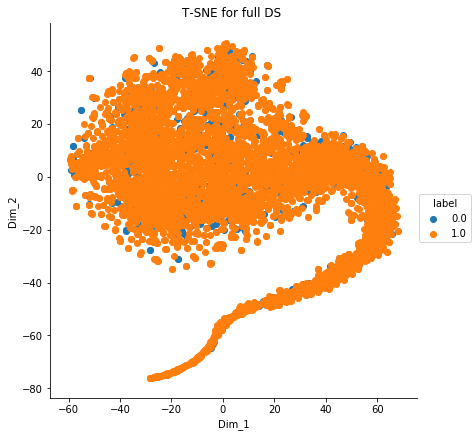

In [269]:
model =TSNE(n_components=2, random_state=0)
tsne_data_full = model.fit_transform(Full_ds)
temp=tsne_data_full
#creating a new data frame which help us in ploting the result data
temp1 = np.concatenate((temp, labels),axis=1)
temp1 = pd.DataFrame(data=temp1, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sns.FacetGrid(temp1, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title("T-SNE for full DS ")
plt.show()

<h2> 2.5 Summary </h2>

<h4>
EDA: <br />
1.  Probability of a project getting approved slightly depends of the PreFix of the Teacher. (Mr Mrs Ms etc ) <br /> 
2.   Lower grade teachers have a slightly higher chance of getting their project approved. (Prek2- grade2 etc) <br /> 
3.  Having more words makes it more descriptive and hence leads to increased probablity approval. (essay, Project Title etc) <br /> 
4.  It is quite evident that lower pricing projects have higher approval rates.
<h4/>
    
